# Лабораторная работа №5.  Цифровой спектральный анализ.

__Вариант 1__

In [300]:
import numpy as np
import scipy as sp
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio

import matplotlib.pyplot as plt
from IPython.display import display, Math

# %matplotlib widget

In [301]:
def DTFT(x, M):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    f = np.fft.fftshift(np.fft.fftfreq(M, d=1))
    x_dtft = np.fft.fftshift(np.fft.fft(x, M))
    
    return f, x_dtft

In [302]:
def plot_window(w, M, eps=1e-12):
    n = w.shape[-1]
    k = np.arange(n)
    w /= sum(w)
    nu, Wn = DTFT(w, M)
    
    # width on 0
    nu_zeros = nu[abs(Wn) < eps]
    nu_zeros_pair = nu_zeros[np.argsort(abs(nu_zeros))[:2]]
    dnu_0 = abs(nu_zeros_pair[0]-nu_zeros_pair[1])
    display(Math(fr'$\Delta\nu_0 = {dnu_0};$  $({(dnu_0*len(w))} \text{{ bins}})$'))
    
    # width on -3 dB
    for db in [-3, -6]:
        nu_pair = nu[np.argsort(np.abs(np.abs(Wn) - 10**(db/20)))[:2]]
        dnu = abs(nu_pair[0]-nu_pair[1])
        display(Math(fr'$\Delta \nu_{{{db}\text{{dB}}}} = {dnu:.2g};$  $({(dnu*len(w)):.2f} \text{{ bins}})$'))
        
    max_abs_sidelobe = 20*np.log10(np.max(abs(Wn[abs(nu) > abs(nu_zeros_pair[0])])))
    display(Math(fr'$\text{{sidelobe}}: {max_abs_sidelobe:.1f} [dB]$'))
    
    
    
    
    fig, ax = plt.subplots(3, 1, figsize=[8, 10], dpi=100)
    ax = ax.flatten()
    
    ax[0].stem(k, w)
    ax[0].set_xlabel('$k$')
    ax[0].set_ylabel('$w[k]$')
    ax[0].grid()
    
    
    ax[1].plot(nu, abs(Wn))
    ax[1].set_xlabel('$\\nu$')
    ax[1].set_ylabel('$|W(\\nu)|$')
    ax[1].grid()

    
    ax[2].plot(nu, 20*np.log10(abs(Wn)/max(abs(Wn))+eps))
    ax[2].set_ylim(ymin=-100)
    ax[2].grid()
    ax[2].set_xlabel(r'$\nu$')
    ax[2].set_ylabel(r'$20 \lg (|W(\nu)|) $ [dB]')
    
    fig.tight_layout()

# Модуль 1. Окна в спектральном анализе методом ДПФ, алгоритмы вычисления ДПФ.

## Задача 1.1. Окна в спектральном анализе

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| $w_1[k]$ | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное | прямоугольное |
| $w_2[k]$ | Бартлетта | Хэмминга | Хэмминга | Бартлетта | Бартлетта | Хэмминга |
| $w_3[k]$ | Flattop | Flattop | Flattop | Flattop | Flattop | Flattop |
| $n_0$ | $20$ | $16$ | $22$  | $24$  | $25$  | $18$  |



Постройте графики для трех окон длины $N=64$ из таблицы во временной  области ($w_i[k]$, $i=1, 2,3$) и в частотной  области (ДВПФ в линейном масштабе и в дБ). 
Для каждого из окон графически определите следующие параметры.
* Ширину $\Delta \nu_0$ главного лепестка на нулевом уровне.
* Ширину $\Delta \nu_{-3\text{dB}}$  главного лепестка на уровне -3дБ от максимума модуля ДВПФ.
* Ширину $\Delta \nu_{-6\text{dB}}$  главного лепестка на уровне -6дБ от максимума модуля ДВПФ.
* Максимальный уровень боковых лепестков в дБ относительно главного. 

Произведите спектральный анализ с помощью ДПФ размерности $M=2048$ последовательности 
$$x[k]=\cos\left(2\pi \dfrac{n_0}{64} k\right)+ \cos\left(2\pi \dfrac{n_0+2}{64} k\right)$$
 со взвешиванием этими оконными функциями. Ответьте на следующие вопросы.
 
1) Для каких оконных функций гармонические компоненты оказались различимы и почему?

2) Как влияет максимальный уровень боковых лепестков на результат спектрального анализа? 


In [303]:
N = 64
M = 2048
windows = {
    'boxcar' : signal.windows.boxcar(N, sym=False),
    'bartlett' : signal.windows.bartlett(N, sym=False),
    'flattop' : signal.windows.flattop(N, sym=False)
} 

n_0 = 20

In [304]:
# сигнал
k = np.arange(N)
x = np.cos(2 * np.pi * n_0 / 64 * k) + np.cos(2 * np.pi * (n_0 + 2) / 64 * k)

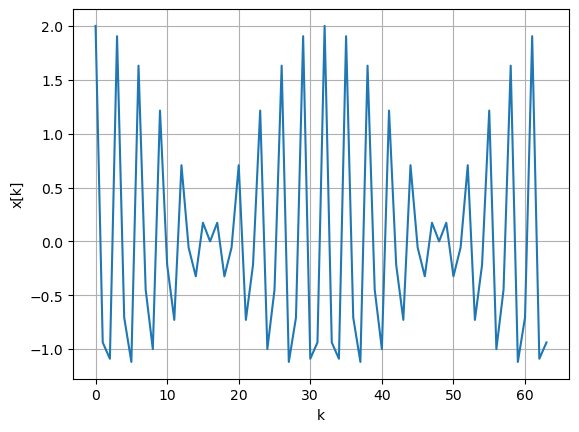

In [305]:
plt.figure()
plt.plot(k, x)
plt.xlabel('k'); plt.ylabel('x[k]')
plt.grid()
plt.show()

### boxcar

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

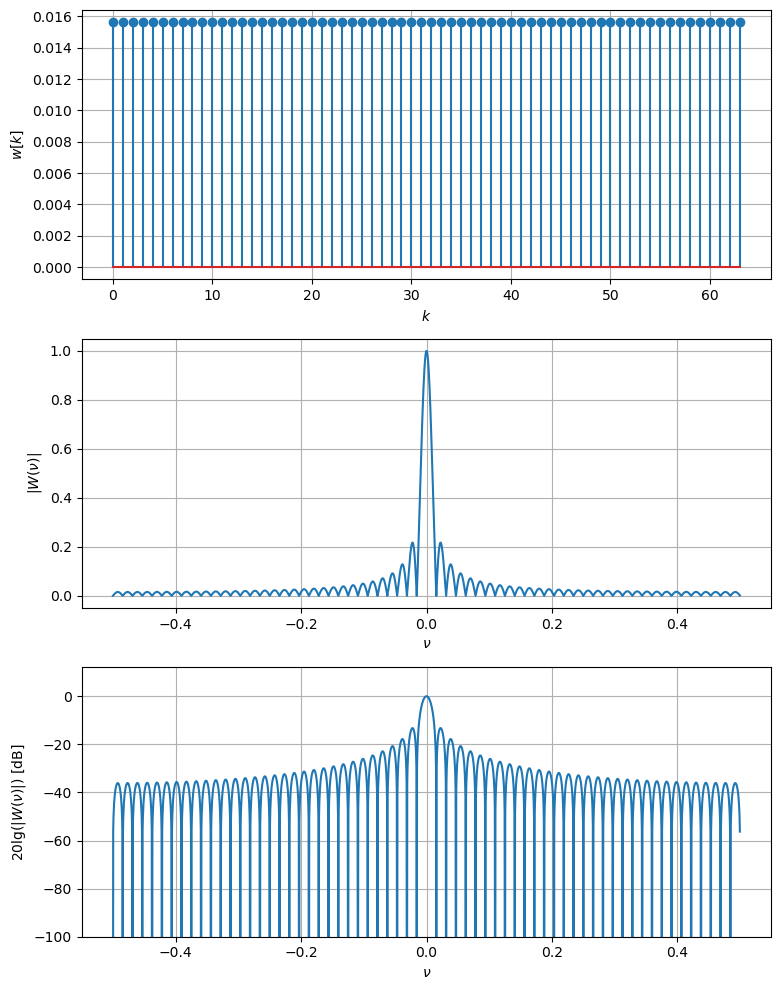

In [306]:
plot_window(windows['boxcar'], M)

### bartlett

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

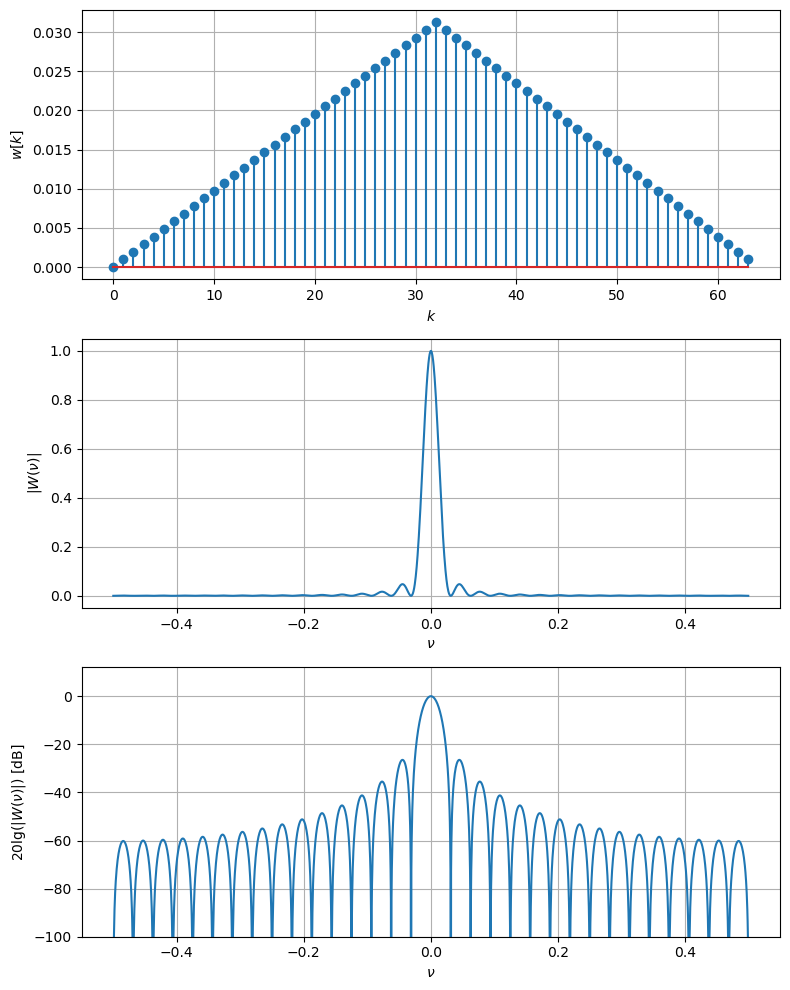

In [307]:
plot_window(windows['bartlett'], M)

### flattop

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

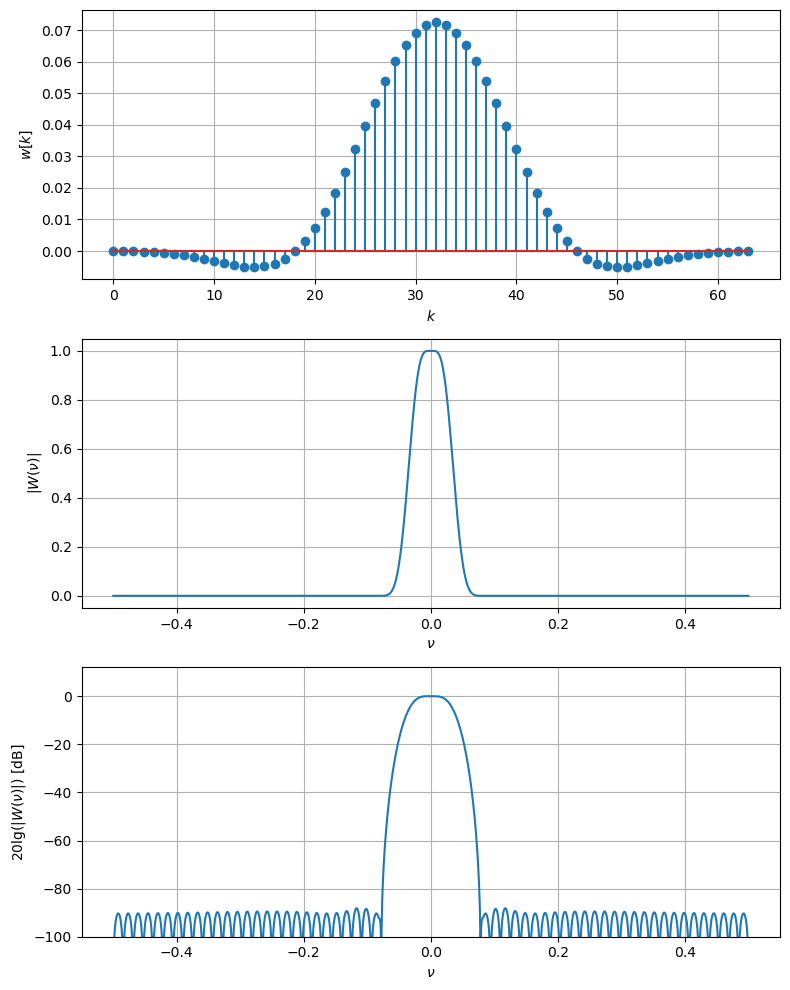

In [308]:
plot_window(windows['flattop'], M)

In [309]:
h_shift_mul = np.cos(2 * np.pi * n_0 / 64 * k) + np.cos(2 * np.pi * (n_0 + 2) / 64 * k)

h_boxcar = windows['boxcar'] * h_shift_mul
h_bartlett = windows['bartlett'] * h_shift_mul
h_flattop = windows['flattop'] * h_shift_mul

f, x_boxcar_fft = DTFT(h_boxcar, M) #DTFT(signal.convolve(x, h_boxcar, 'same'), M)
_, x_bartlett_fft = DTFT(h_bartlett, M)
_, x_flattop_fft = DTFT(h_flattop, M)

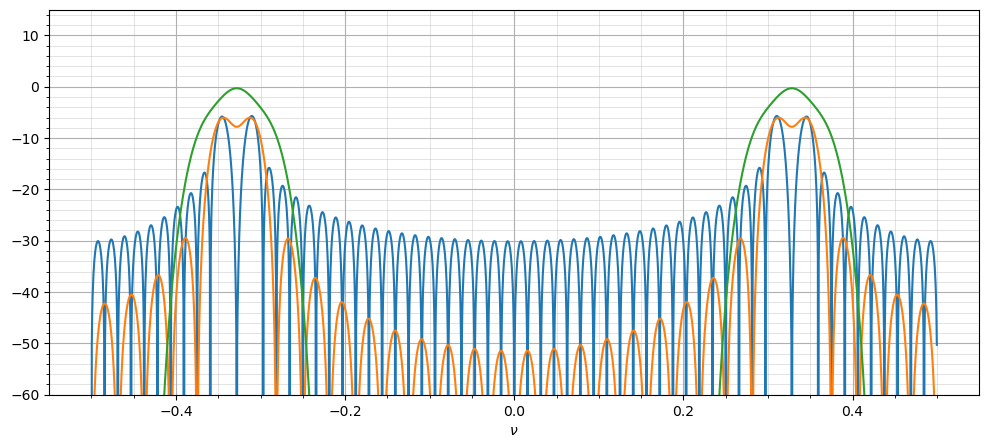

In [311]:
plt.figure(figsize=(12, 5))
plt.plot(f, 20*np.log10(abs(x_boxcar_fft)+1e-15))
plt.plot(f, 20*np.log10(abs(x_bartlett_fft+1e-15)))
plt.plot(f, 20*np.log10(abs(x_flattop_fft)+1e-15))
plt.minorticks_on(); plt.ylim([-60, None])#; plt.xlim([0.2, 0.5])
plt.grid(True, 'minor', lw=0.5, alpha=0.5); plt.grid(True, 'major')
plt.xlabel(r'$\nu$')
plt.show()

## Задача 1.2. Алгоритмы вычисления ДПФ.
| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |

1) Используя данные из файла, сформировать последовательность $x[k]$ длиной 2048 отсчетов (например, по отсчетам сигнала из середины записи). 

2) Вычислить 2048-точечное ДПФ для $x[k]$, используя 
* а) матричную форму ДПФ, 
* б) быстрое преобразование Фурье. 

Сравнить результаты. 

3) Написать программу вычисления одного отсчета ДПФ по алгоритму Герцеля. Сравнить результаты вычислений с БПФ для любых трех значений $n$. 

---

**Алгоритм Герцеля**

1. Для $m=0,\,1,\, \dots,\, N-1$ определяем 

$${{V}_{n}}[m]=x[m]+2\cos (2\pi n/N){{V}_{n}}[m-1]-{{V}_{n}}[m-2],\quad 0\le m\le N-1,$$

2. Вычисляем $X[n]$ (при $m=N-1$):

$$X[n]={{\left. {{y}_{n}}[m] \right|}_{m=N-1}}={{\left. \left( W_{N}^{-n}{{V}_{n}}[m]-{{V}_{n}}[m-1] \right) \right|}_{m=N-1}}.$$
$$V_n[-1]=V_n [-2] = 0$$

---



In [256]:
N = 2**11
audiofile_path = 'dataset_lab5\major-scale-piano.wav'
Audio(audiofile_path)

In [257]:
fs, x = wavfile.read(audiofile_path)
x = x[:, 0]  # оставим один канал

In [258]:
x_mid_idx = len(x)//2
x = x[x_mid_idx-N//2:x_mid_idx+N//2]

### Матричная форма ДПФ

In [259]:
F = sp.linalg.dft(N)
X_mat = F @ x

### БПФ

In [260]:
X_fft = np.fft.fft(x)

In [261]:
np.allclose(X_mat, X_fft)  # Результаты совпадают

True

### Алгоритм Гёрцеля

$${{y}_{n}}[m]=W_{N}^{-n}x[m]-x[m-1]+2\cos (2\pi n/N){{y}_{n}}[m-1]-{{y}_{n}}[m-2].$$

**Алгоритм Герцеля**

1) Для $m=0,\,1,\, \dots,\, N-1$ определяем 

$${{V}_{n}}[m]=x[m]+2\cos (2\pi n/N){{V}_{n}}[m-1]-{{V}_{n}}[m-2],\quad 0\le m\le N-1,$$

2) Вычисляем $X[n]$ (при $m=N-1$):

$$X[n]={{\left. {{y}_{n}}[m] \right|}_{m=N-1}}={{\left. \left( W_{N}^{-n}{{V}_{n}}[m]-{{V}_{n}}[m-1] \right) \right|}_{m=N-1}}.$$
$$V_n[-1]=V_n [-2] = 0$$


In [262]:
def goertzel(x, n):
    y = signal.lfilter(
        b=[np.exp(2j*np.pi*n/N), -1], 
        a=[1, -2 * np.cos(2*np.pi*n/N), 1],
        x=x
    )
    
    return y

In [263]:
X_goertzel = np.array([goertzel(x, n)[-1] for n in range(N)])

In [264]:
np.allclose(X_fft, X_goertzel)  # Результаты совпадают

True

# Модуль 2. Кратковременное дискретное преобразование Фурье

## Задача 2.1. Кратковременное ДПФ (STFT)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | major-scale-piano.wav | xylophone1.wav | xylophone9.wav | glockenspiel1.wav | flute.wav | glockenspiel2.wav |


Вычислите с помощью Python кратковременное дискретное преобразование Фурье (STFT) для отсчетов сигнала, содержащихся в аудиофайле из таблицы. Изобразите спектрограмму сигнала. Длину окна $M$, тип оконной функции, число точек в перекрытии $L$, масштабы осей и размерность ДПФ $N_\text{FFT}$ самостоятельно подберите так, чтобы можно было выделить гармонические компоненты в сигнале. Ответьте на следующие вопросы.

1) Какие выводы можно сделать о составе данного сигнала по спектрограмме?  

2) Чему равны длина окна и размер перекрытия в секундах? Как это соотносится с графиком?

3) Какое разрешение по времени и какое по частоте для данной спектрограммы? 

4) Какие изменения можно наблюдать в спектрограмме, если изменяется:

* а) тип оконной функции,
* б) длина окна $M$,
* в) размерность ДПФ $N_\text{FFT}$ за счет дополнения нулевыми отсчетами?










In [265]:
audiofiles_root = './dataset_lab5/' 
audiofile_name = 'major-scale-piano.wav'
audiofile_path = audiofiles_root + audiofile_name

fs, x = wavfile.read(audiofile_path)
x = x[:, 0]  # оставим один канал
 
print(f'Fs = {fs} [Hz]; len(x) = {len(x)} samples, i.e. {len(x)/fs:.3f} [s]')

Fs = 44100 [Hz]; len(x) = 416879 samples, i.e. 9.453 [s]


In [266]:
Audio(audiofile_path)

STFT paremeters

In [267]:
nperseg = 1024
noverlap = nperseg//2
nfft = 2**12
window_name = 'hann'

nfft = max(nfft, nperseg)

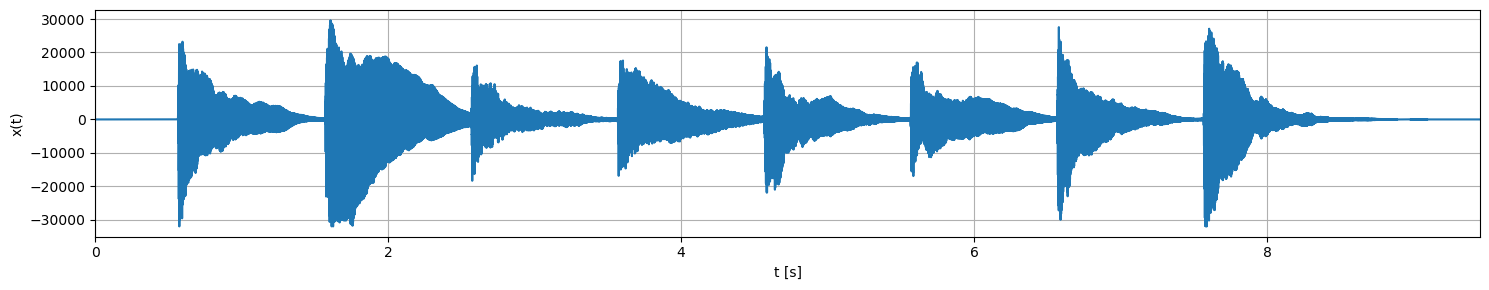

In [268]:
plt.figure(figsize=(15, 3))
plt.plot(np.arange(0, len(x)) / fs, x)
plt.grid()
plt.xlim([0, len(x)/fs])
plt.xlabel('t [s]'); plt.ylabel('x(t)')
plt.tight_layout()
plt.show()

Check COLA and NOLA conditions for window with given nperseg and noverlap

In [269]:
check_COLA = signal.check_COLA(window=signal.windows.get_window(window_name, nperseg), nperseg=nperseg, noverlap=noverlap)
check_NOLA = signal.check_NOLA(window=signal.windows.get_window(window_name, nperseg), nperseg=nperseg, noverlap=noverlap)

print(f'COLA: {check_COLA}\nNOLA: {check_NOLA}')

COLA: True
NOLA: True


In [270]:
f, t, Zxx = signal.stft(x=x, fs=fs, window=window_name, nperseg=nperseg, noverlap=noverlap, nfft=nfft, return_onesided=True)

In [271]:
def plot_stft(t, f, Zxx, max_f=None, title=''):
    plt.figure(figsize=[13.5, 5], dpi=200)
    plt.title(title)
    plt.pcolormesh(t, f,  20*np.log10(np.abs(Zxx[:-1, :-1])/(np.max(abs(Zxx[:-1, :-1])))+1e-15), vmin=-60, cmap=plt.get_cmap('inferno'), shading='flat')
    cb = plt.colorbar()
    cb.set_label('[dB]')
    if max_f is not None:
        plt.ylim([0, max_f])
    plt.ylabel('f [Hz]')
    plt.xlabel('t [s]')
    plt.tight_layout()

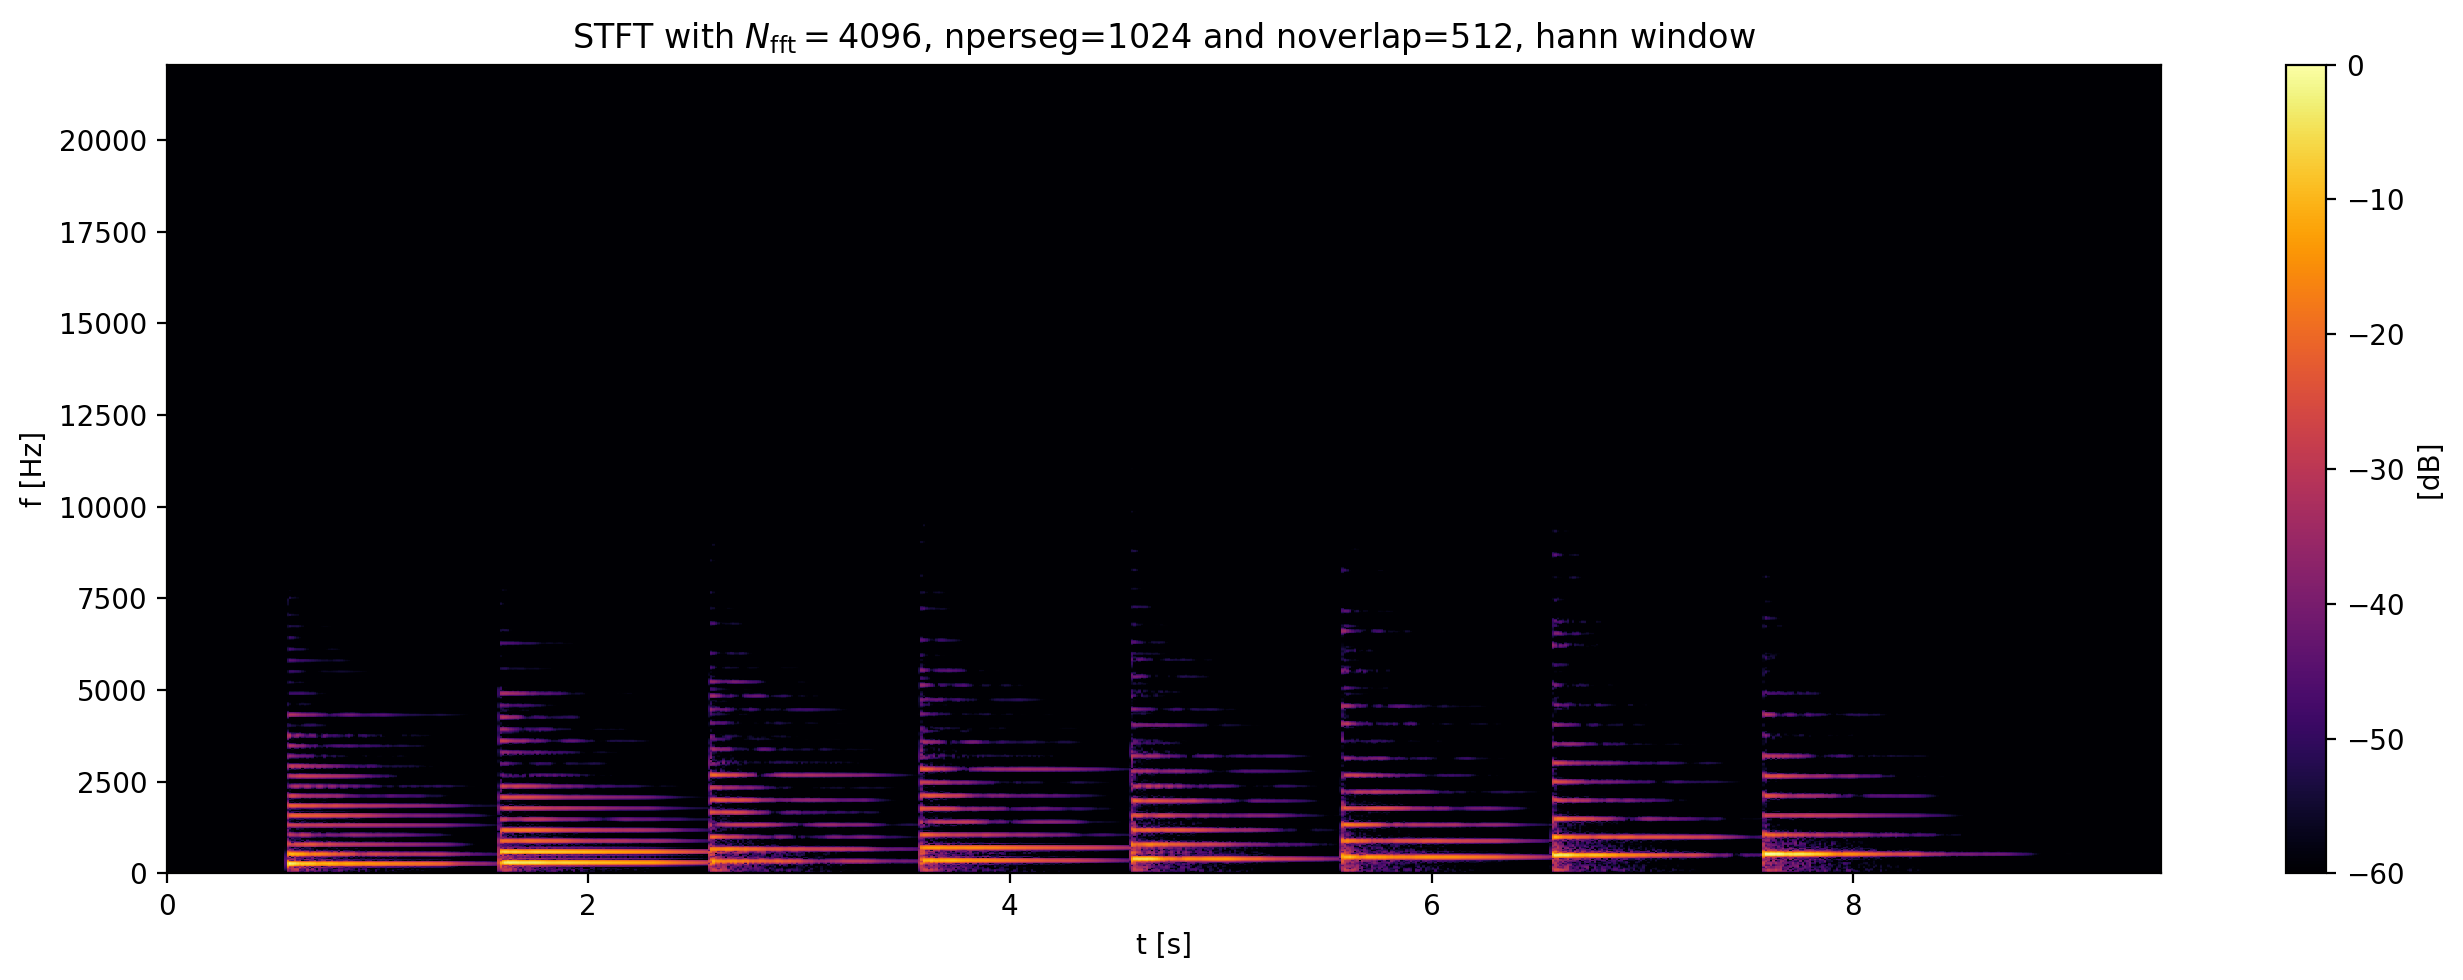

In [272]:
plot_stft(t, f, Zxx, max_f=None, title=fr'STFT with $N_{{\text{{fft}}}}={nfft}$, nperseg={nperseg} and noverlap={noverlap}, {window_name} window')

#  Модуль 3. Периодограммные методы оценки СПМ

## Задача 3.1. Интерполяция периодограммы дополнением нулевых отсчетов (Zero Padding)

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_2_1.npy | variant_2_ex_2_1.npy | variant_3_ex_2_1.npy | variant_4_ex_2_1.npy | variant_5_ex_2_1.npy| variant_6_ex_2_1.npy|

По представленным в файле отсчетам сигнала построить периодограмму, для которой размерность ДПФ совпадает с длительность сигнала. Сравнить ее с периодограммой, для которой размерность ДПФ в 8 раз больше. Частота дискретизации  $f_s=16$ кГц. Ответить на вопросы.

1) Какое разрешение по частоте, обусловленное сеткой частот ДПФ, у периодограммы в первом и во втором случае?

2) Как частота наблюдаемой гармонической компоненты соотносится с сеткой частот ДПФ в первом и во втором случае? 

3) Почему расчет периодограммы достаточно провести для интервала частот $f \in [0; 0,5f_s]$?

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x[k]$  (`x`). 

In [273]:
x = np.load(f'dataset_lab5/variant_{1}_ex_2_1.npy')
fs = 16e3
k = np.arange(x.shape[0])
x_len = len(x)
print(f'len(x) = {x_len}')

len(x) = 64


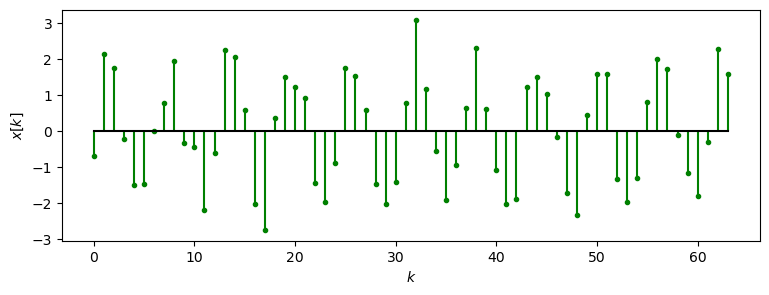

In [274]:
plt.figure(figsize=[9, 3])
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.stem(k, x, linefmt='g', markerfmt='g.', basefmt='k')
plt.show()

In [275]:
def compute_psd_via_zp_fft(x, nfft):
    N=len(x)
    Xn=np.fft.fft(x, nfft)
    X_psd = abs(Xn)**2/N/fs
    f = np.arange(X_psd.shape[0])/X_psd.shape[0] * fs
    
    return f, X_psd

In [276]:
def plot_psd(f, x_psd, fs, db=False):
    plt.figure(figsize=[9, 3])
    if db:
        plt.plot(f, 10*np.log10(x_psd))
    else:
        plt.plot(f, x_psd)
    plt.xlim([0, fs/2])
    plt.grid()
    plt.title(f"$N = {len(x_psd)}$")
    plt.xlabel('f [Hz]')
    if db:
        plt.ylabel('PSD estimate [dBW/Hz]')
        plt.ylim([-50, None])
    else:
        plt.ylabel('PSD estimate [W/Hz]')
    plt.tight_layout()

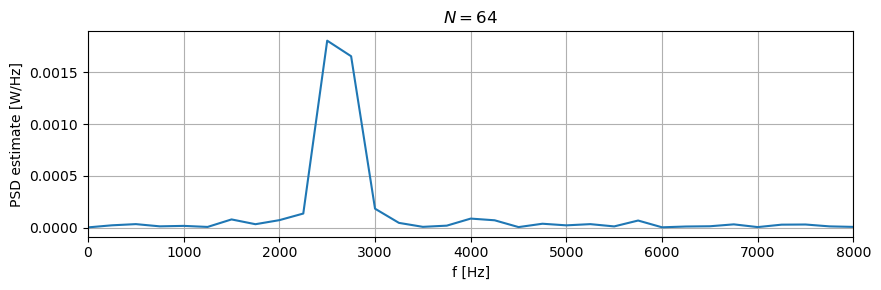

In [277]:
f, X_psd =compute_psd_via_zp_fft(x, nfft=x_len)
plot_psd(f, X_psd, fs)

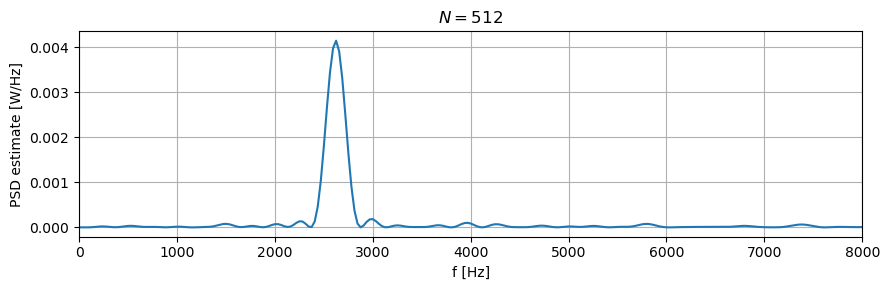

In [278]:
f, X_psd =compute_psd_via_zp_fft(x, nfft=8*x_len)
plot_psd(f, X_psd, fs)

## Задача 3.2. Выделение синусоиды на фоне шума
Постройте периодограмму для оценки СПМ процесса, по выборкам, которые могут быть описаны формулой

$$x[k]=a_1 \sin(2\pi k f_0 /f_s) + \varepsilon[k], \;\; k=0, 1, \dots, N-1,$$

где $N=64$, $\varepsilon[k]$ — дискретный белый гауссовский шум c нулевым средним и с дисперсией $\sigma^2=400$ (`scale=20`), $a_1=5$, частота дискретизации  $f_s=16$ кГц, $f_0=2$ кГц.

Определите, возможно ли выделение гармонической компоненты в периодограмме на фоне шума (при $N=64$)? Вычислите такую длину записи (реализации), чтобы математическое ожидание оценки СПМ для чистого сигнала на частоте $f_0$ превосходило в 40 раз  математическое ожидание оценки СПМ шума. Постройте периодограмму для такого случая.

In [279]:
N = 64
a1 = 5.
fs = 16e3
f0 = 2e3
sigma = 20

k = np.arange(N)
noise = np.random.normal(loc=0, scale=sigma, size=(N,))
x = a1 * np.sin(2*np.pi*k*f0/fs) + noise

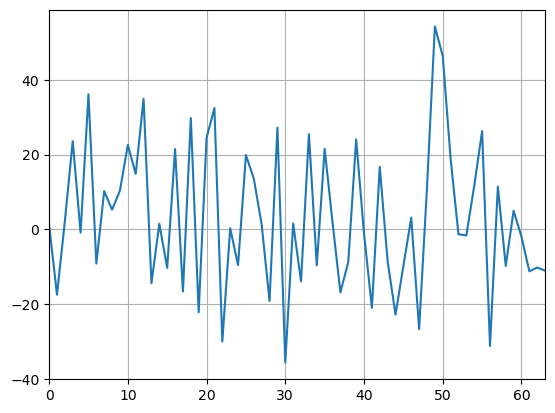

In [280]:
plt.figure()
plt.plot(k, x)
plt.xlim([0, N-1])
plt.grid()
plt.show()

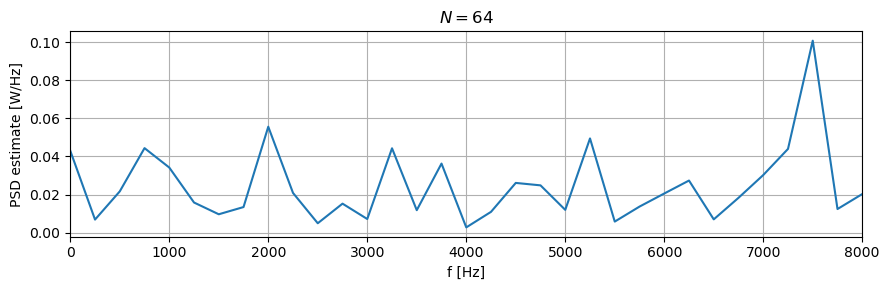

In [281]:
f, X_psd =compute_psd_via_zp_fft(x, nfft=N)
plot_psd(f, X_psd, fs)

Предположим, что требуется оценить СПМ случайного процесса
$${{x}_{\text{сл}}}[k]={a_1}\sin (2\pi {{f}_{1}}k\Delta t+{{\phi }_{1}})+e[k]$$
где 
* $a_1$ — известная амплитуда,
* $e[k]$ — дискретный белый шум c нулевым средним и дисперсией ${{\sigma }^{2}}$, 
* ${{f}_{1}}=2\ \text{кГц}$,  ${{f}_{\text{s}}}=1/\Delta t=10\ \text{Гц}$, 
* ${\phi }_{1}$ — случайная величина с равномерным распределением на отрезке $[0,2\pi ]$.

На частоте $f_0$

$M\left\{ \hat{G}\left( f_0 \right) \right\}=\Delta t\dfrac{{{a_1}^{2}}}{4U} |W(0)|^2 +\sigma^2 \ \Delta t$

$U=\int\limits_{-1/2}^{\text{1}/2}{{{\left| W(\nu ) \right|}^{2}}}d\nu =\sum\limits_{k=0}^{N-1}{{{w}^{2}}[k]}$

Для прямоугольного окна $W(0)=N=U$, где $N$ — длина окна. Тогда на частоте $f_0$

$M\left\{ \hat{G}\left( f_0 \right) \right\}=\Delta t  \left( \dfrac{{{a_1}^{2}}}{4}N+\sigma^2 \right)$

Истинная СПМ

$G(f)=\sigma^2 \ \Delta t + \dfrac{{{a_1}^{2}}}{4} \sum_{m=-\infty}^{\infty} \left( \delta (f-{{f}_{1}}+f_s m)+\delta (f+{{f}_{1}}+f_s m) \right)$

Таким образом, для обнаружения гармонического сигнала на фоне шума необходимо $\dfrac{A^2}{4}N \gg \sigma^2$ 

In [282]:
gain = 40

N_res = int(np.ceil(gain * 4 * sigma**2 / a1**2))
print(f'N_res = {N_res}')

N_res = 2560


In [283]:
k_long = np.arange(N_res)
noise = np.random.normal(loc=0, scale=sigma, size=(N_res,))
x_long = a1 * np.sin(2*np.pi*k_long*f0/fs) + noise

In [284]:
10*np.log10(noise.var()), 20*np.log10(a1)

(25.969752590867476, 13.979400086720377)

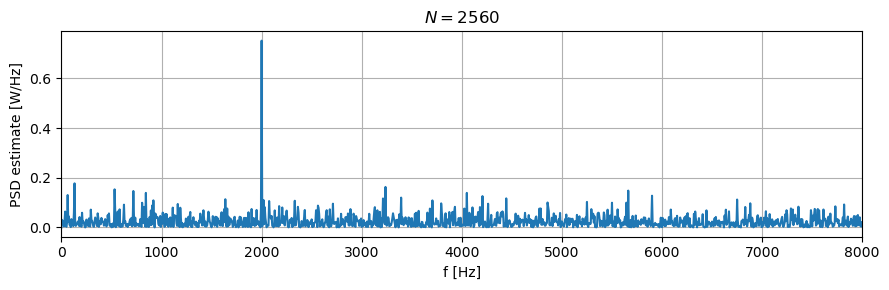

In [285]:
f, X_psd =compute_psd_via_zp_fft(x_long, nfft=N_res)
plot_psd(f, X_psd, fs, db=False)

#  Модуль 4. Методы оценки СПМ (продолжение)

## Задача 4.1. Методы Уэлча и  Блэкмана-Тьюки

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_1.npy | variant_2_ex_3_1.npy | variant_3_ex_3_1.npy | variant_4_ex_3_1.npy | variant_5_ex_3_1.npy| variant_6_ex_3_1.npy|

По отсчетам из файла (см. таблицу) постройте оценку СПМ по методам:
* периодограмм,
* Блэкмана-Тьюки,
* модифицированных периодограмм Уэлча.

Сделайте выводы о составе процесса. Выбор параметров оценок СПМ осуществите самостоятельно. Частота дискретизации $f_s=16$ кГц. Сравните результаты. 

Оцените частоту $f_1$, если известно, что случайный процесс, СПМ которого оценивается по этим выборкам, имеет вид 
$$x(t)=a_1 \sin(2\pi f_1 t) + \varepsilon(t),$$
где $\varepsilon(t)$ — белый шум с нулевым математическим ожиданием.


In [286]:
def plot_psd(f, x_psd, fs, db=False, title=''):
    plt.figure(figsize=[9, 3])
    if db:
        plt.plot(f, 10*np.log10(x_psd))
    else:
        plt.plot(f, x_psd)
    plt.xlim([0, fs/2])
    plt.grid()
    plt.title(title)
    plt.xlabel('f [Hz]')
    if db:
        plt.ylabel('PSD estimate [dBW/Hz]')
        plt.ylim([-50, None])
    else:
        plt.ylabel('PSD estimate [W/Hz]')
    plt.tight_layout()

In [287]:
fs = 16e3
x = np.load('dataset_lab5/variant_1_ex_3_1.npy')

### Метод периодограмм

Оценка СПМ по методу Шустера (немодифицированная периодограмма)
$$\hat{G}(f)=\frac{\Delta t}{N}{{\left| \sum\limits_{k\ =\ 0}^{N-1}{x[k]\,{{e}^{-j2\pi fk\Delta t}}} \right|}^{2}}.$$ 
Модифицированная периодограмма:
$$\hat{G}(f)=\frac{\Delta t}{U}{{\left| \sum\limits_{k\ =\ 0}^{N-1}{w[k]x[k]\,{{e}^{-j2\pi fk\Delta t}}} \right|}^{2}}.$$ 
$$U=\sum_{k=0}^{N-1} |w[k]|^2$$

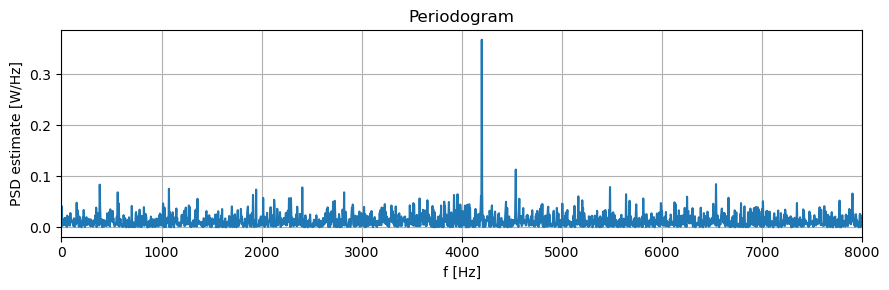

In [288]:
f, Pxx_periodogram = signal.periodogram(x, fs, window='boxcar', return_onesided=True, detrend=False)
plot_psd(f, Pxx_periodogram, fs, title='Periodogram')

In [289]:
# собственная эквивалентная реализация

def psd_periodogram(x, w, fs, log_flag=True):
    n = len(x)
    wn =np.sum(w**2)

    X = (np.abs(np.fft.fft(x*w))**2) / (wn * fs)
    if n % 2 == 0:
        X = X[:n//2+1]
        X[1:-1] *= 2
        frq = fs * np.arange(0, n/2+1, 1) / n
    else:
        X = X[:n//2+1]
        X[1:] *= 2
        frq = fs * np.arange(0, n/2, 1) / n
    
    if log_flag:
        X = 10.0 * np.log10(X)
    
    return frq, X

In [290]:
f_1, Pxx_periodogram_1 = psd_periodogram(x, w=signal.windows.get_window('boxcar', Nx=len(x)), fs=fs, log_flag=False)
#plot_psd(f_1, Pxx_periodogram_1, fs, title='Periodogram')

In [291]:
f1 = f[np.argmax(Pxx_periodogram)]
print(f'f_1 = {f1}')

f_1 = 4199.21875


In [292]:
np.allclose(Pxx_periodogram, Pxx_periodogram_1)

True

### Метод Блекмана-Тьюки (коррелограммный метод)

Корреляционный метод оценки СПМ основан на теореме Винера-Хинчина в дискретном варианте:

$$G(f)= \Delta t \sum \limits_{m=-\infty}^{\infty} R_x[m] \exp(-j 2\pi m f \Delta t).$$

Она заключается в том, что истинная спектральная плотность мощности $G(f)$ (СПМ) и автокорреляционная функция дискретного случайного процесса $R_x[m]$ связаны дискретным во времени преобразованием Фурье (ДВПФ). 

Для стационарного случайного процесса автокорреляционная функция (АКФ) (последовательность) $R_x[m]=M\{ x[k] x[k+m]\}$. Это функция от временного сдвига $m \in Z$.

Оценка по методу Блэкмана-Тьюки $\hat{G}_{BT}(f)$ по выборке длиной в $N$ отчетов определяется по формуле:
$$\hat{G}_{BT}(f)=\Delta t \sum \limits_{m=-(N_1-1)}^{N_1-1} \hat{R}_x[m] w[m]\exp(-j 2\pi m f \Delta t), $$
где 
* $N_1$ — ограничение на максимальный сдвиг в АКФ, $N_1=\left\lceil \dfrac{N}{10} \right\rceil$ (округление до ближайшего целого в сторону увеличения),
* $w[k]$ —  симметричная относительно нуля оконная функция длины $2N_1-1$,
* $\hat{R}_x[m]$ —  оценка автокорреляционной функции (коррелограмма) длиной в $2N_1-1$ отчетов, четная функция ($\hat{R}_x[m]=\hat{R}_x[-m]$ ). Используется смещенная либо несмещенная оценка АКФ.

* * __Смещенная__ оценка АКФ вычисляется по формуле
$$\check{R}_x[m] = \dfrac{1}{N} \sum_{k=0}^{N-|m|-1} x[k] x[k+m], \; -(N_1-1)\le m \le N_1 - 1.$$

* * __Несмещенная__ оценка АКФ вычисляется по формуле ($(N-|m|)$ — максимальное число ненулевых слагаемых в сумме)
$$\hat{R}_x[m] = \dfrac{1}{N-|m|} \sum_{k=0}^{N-|m|-1} x[k] x[k+m], \; -(N_1-1)\le m \le N_1 - 1.$$

Несмещенность оценки АКФ означает, что 
$$ M\{ \hat{R}_x [m]\} = R_x[m].$$

Связь между смещенной и несмещенной оценкой:

$ \check{R}_x[m]={\dfrac{N-|m|}{N} \hat{R}_x[m]} $.

При $N\gg N_1 > |m|$ смещение невелико: $\check{R}_x[m]  \approx \hat{R}_x[m]$. 

__Для того, чтобы оценка СПМ была неотрицательной, следует использовать смещенную оценку АКФ с окном, ДВПФ которого не принимает отрицательных значений (например, окно Бартлетта)__. 

In [229]:
D = 256  # semi-length

In [230]:
def psd_correlogram(x, D, nfft, fs, w=None, unbiased=True):
    N = len(x)
    rxx = np.zeros(2*D+1, dtype=np.complex128)
    
    if unbiased:
        # расчет значений автокорреляционной функции для положительных m
        for m in range(D+1):
            ind = np.arange(0, N-m-1, 1) 
            rxx[m+D] = np.sum(x[ind+m]*np.conj(x[ind])) / (N-m)
            
        # расчет значений автокорреляционной функции для отрицательных m    
        for m in np.arange(-D, 0, 1):
            ind = np.arange(0, N+m-1, 1)  
            rxx[m+D] = np.sum(np.conj(x[ind-m])*x[ind]) / (N+m)
    else:
        for m in range(D+1):
            ind = np.arange(0, N-m-1, 1) 
            rxx[m+D] = np.sum(x[ind+m]*np.conj(x[ind])) / N
             
        for m in np.arange(-D, 0, 1):
            ind = np.arange(0, N+m-1, 1)  
            rxx[m+D] = np.sum(np.conj(x[ind-m])*x[ind]) / N
            
    # Оконное взвешивание
    if w is not None:
        rxx = rxx * signal.windows.get_window(w, Nx=2*D+1)
    
    # расчет СПМ
    X = np.zeros(nfft, dtype=np.complex128)
    frq = fs * np.arange(-nfft/2, nfft/2+1, 1) / nfft
    m = np.arange(-D,D+1,1)
    X = np.zeros(nfft+1, dtype=np.complex128)
    
    for m in range(2*D+1):
        X = X + rxx[m]*np.exp(-2j*np.pi*m*frq / fs) / fs
        
    X = np.abs(X)
    
    return frq, X

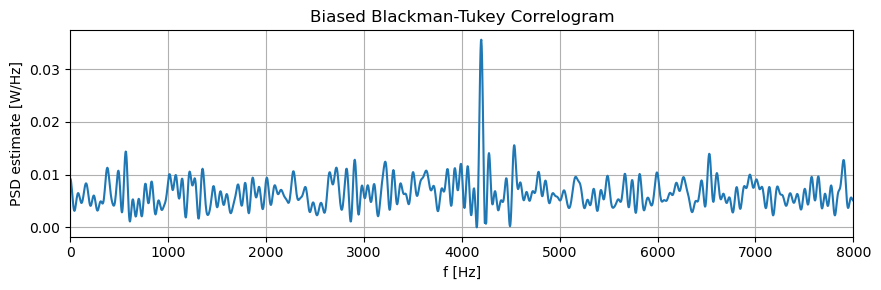

In [239]:
f, Pxx_correlogam_biased = psd_correlogram(x, D=D, nfft=2**12, w='boxcar', fs=fs, unbiased=False)
plot_psd(f, Pxx_correlogam_biased, fs, title='Biased Blackman-Tukey Correlogram')

In [240]:
f1 = abs(f[np.argmax(Pxx_correlogam_biased)])
print(f'f_1 = {f1}')

f_1 = 4199.21875


### Метод Уэлча

Пусть заданы шаг дискретизации $\Delta t$ анализируемого процесса и число отсчетов $N$ действительной последовательности $x[k]$.  Разделим последовательность $x[k]$ на $P$ перекрывающихся сегментов по $D$ отсчетов в каждом, следующих с шагом $S$ ($S\le D$). Сегмент$p$ задается формулой:
	$${{x}^{(p)}}[k]=x[pS+k]$$	
Число $P$ соответствует целой части числа $(N-D)/S+1$. Для каждого сегмента вычисляется оценка 
	$$\hat{G}{{}_{p}}(f)=\frac{\Delta t}{U}{{\left| \sum\limits_{k\ =\ 0}^{D-1}{w[k]{{x}^{(p)}}[k]\,{{e}^{-j2\pi fk\Delta t}}} \right|}^{2}}.$$	
где
	$$U=\sum\limits_{k=0}^{D-1}{{{w}^{2}}[k]}=\int\limits_{-1/2}^{1/2}{{{\left| W(\nu ) \right|}^{2}}}d\nu $$	
Множитель $U$ необходимо для того, чтобы оценка была несмещенной. Далее для выбранной сетки частот производится усреднение: 
	$$\hat{G}{{}_{W}}\left( f \right)=\frac{1}{P}\sum\limits_{p=0}^{P-1}{{{{\hat{G}}}_{p}}\left( f \right)}$$	


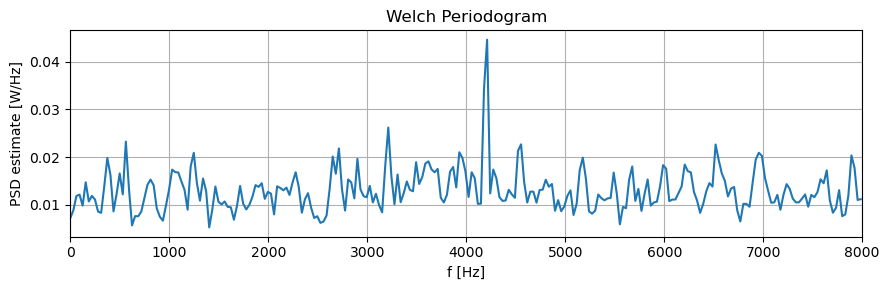

In [241]:
f, Pxx_welch = signal.welch(x, fs=fs, window=signal.windows.get_window('hann', 2*D+1), nperseg=2*D+1, noverlap=D, detrend=False, return_onesided=True)
#f = np.fft.fftshift(f)
#Pxx_welch = np.fft.fftshift(Pxx_welch)
plot_psd(f, Pxx_welch, fs, title='Welch Periodogram')

In [242]:
f1 = abs(f[np.argmax(Pxx_welch)])
print(f'f_1 = {f1}')

f_1 = 4210.526315789473


In [154]:
def psd_welch(x, nfft, w, shift, fs, log_flag=False):
    n = len(x)
    p = 0
    X = 0
    c = 0
    
    while p + nfft <= n:
        frq, X0  = psd_periodogram(x[p:p+nfft], w, fs, log_flag = False)
        X = X + X0
        p = p + shift
        c += 1
    
    # обработка последнего интервала (в sp он отбрасывается): 
    # if p < n :  
    #     tmp = np.zeros(nfft, dtype=np.complex128)
    #     tmp[0:n-p] = x[p:n]
    #     frq, X0  = psd_periodogram(tmp, w, fs, log_flag = False)
    #     X = X + X0
    #     c += 1
        
    X = X / c
        
    if log_flag:
        X = 10.0 * np.log10(X)  
          
    return frq, X

In [155]:
f1, Pxx_welch1 = psd_welch(x, nfft=2*D+1, w=signal.windows.get_window('hann', 2*D+1), shift=D, fs=fs)

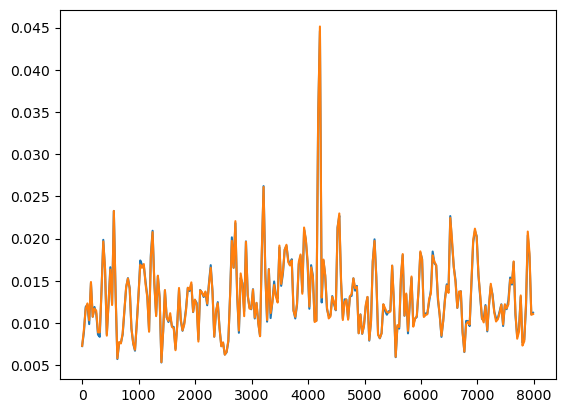

In [156]:
plt.figure()
plt.plot(f, Pxx_welch)
plt.plot(f1, Pxx_welch1)
plt.show()

## Задача 4.2*. Метод Блэкмана-Тьюки для несмещенной оценки АКФ

Модифицируйте функции `auto_correlation` и `blackman_tukey_estimator` так, чтобы их можно было использовать и с несмещенной оценкой АКФ (со значениями соответствующих параметров `unbiased`). Постойте оценку СПМ по методу Блэкмана-Тьюки с несмещенной оценкой АКФ для данных из задачи 4.1. Выбор окна и размерность ДПФ осуществить самостоятельно. Сравните результат с задачей 4.1. 

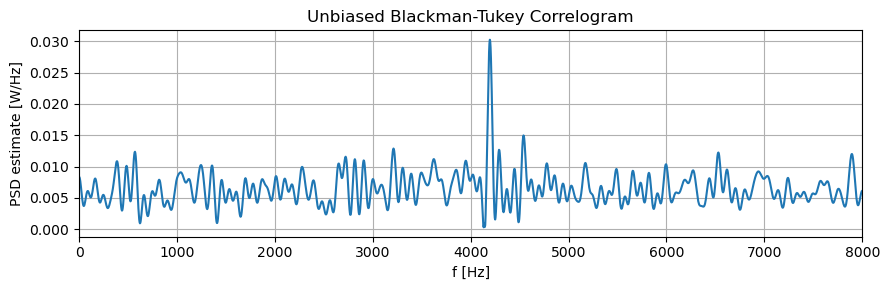

In [297]:
f, Pxx_correlogam_unbiased = psd_correlogram(x, D=len(x)//20, nfft=2**12, w='boxcar', fs=fs, unbiased=True)
plot_psd(f, Pxx_correlogam_unbiased, fs, title='Unbiased Blackman-Tukey Correlogram')

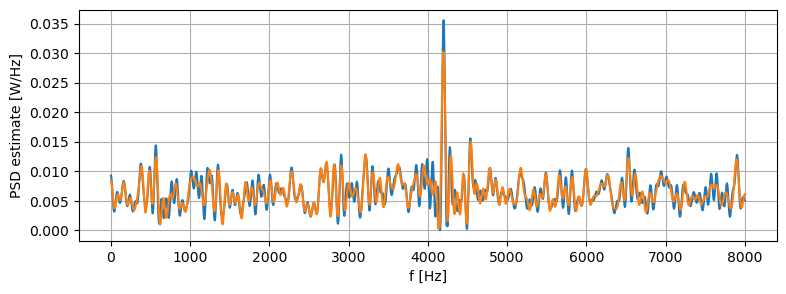

In [298]:
plt.figure(figsize=(9, 3))
plt.plot(f[len(x)//2:], Pxx_correlogam_biased[len(x)//2:])
plt.plot(f[len(x)//2:], Pxx_correlogam_unbiased[len(x)//2:])
plt.grid(); plt.xlabel('f [Hz]'); plt.ylabel('PSD estimate [W/Hz]')
plt.show()

In [159]:
f1 = abs(f[np.argmax(Pxx_correlogam_unbiased)])
print(f'f_1 = {f1}')

f_1 = 4195.3125


## Задача 4.3*. Оценка кросс-спектральной плотности мощности 

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_3.npy | variant_2_ex_3_3.npy | variant_3_ex_3_3.npy | variant_4_ex_3_3.npy | variant_5_ex_3_3.npy| variant_6_ex_3_3.npy|

Для данных из файла (см. таблицу) об отсчетах сигналов из ансамбля реализаций случайных процессов $x(t)$ и $y(t)$ построить с помощью метода Уэлча
* оценку СПМ процесса $x(t)$,
* оценку СПМ процесса $y(t)$,
* модуль оценки взаимной СПМ процессов  $x(t)$ и $y(t)$.

Параметры оценок определить самостоятельно. Сделать выводы. 

$ G_{xy}(f)= \Delta t \sum \limits_{m=-\infty}^{\infty} R_{xy}[m] \exp(-j 2\pi m f \Delta t)  $ 

$ R_{xy}[m] = \mathbb{E} \left[ x[n+m] y^*[n] \right] $

In [160]:
x, y = np.load('dataset_lab5/variant_1_ex_3_3.npy')

In [161]:
f, Pxx_welch = signal.welch(x, fs=fs, window='hann', nperseg=256, detrend=False, return_onesided=True)
f, Pyy_welch = signal.welch(y, fs=fs, window='hann', nperseg=256, detrend=False, return_onesided=True)
f, Pxy_welch = signal.csd(x, y, fs=fs, window='hann', nperseg=256, detrend=False, return_onesided=True)

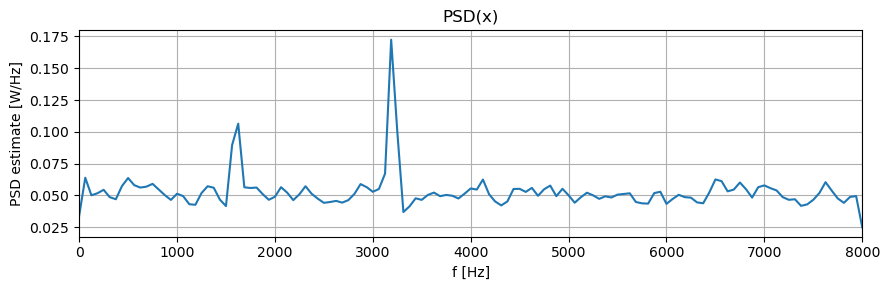

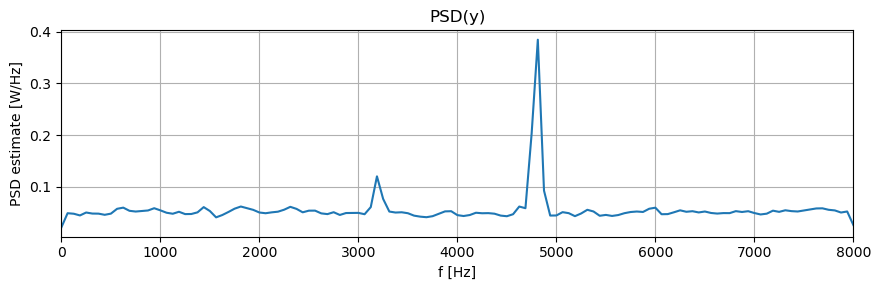

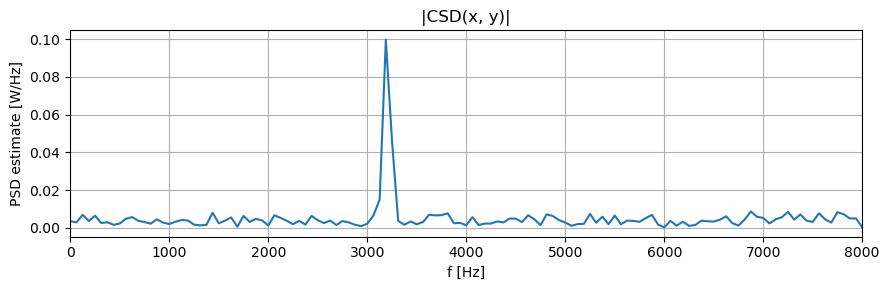

In [162]:
plot_psd(f, Pxx_welch, fs, title='PSD(x)')
plot_psd(f, Pyy_welch, fs, title='PSD(y)')
plot_psd(f, abs(Pxy_welch), fs, title='|CSD(x, y)|')  # |.|, т.к. CSD - комплекснозначная

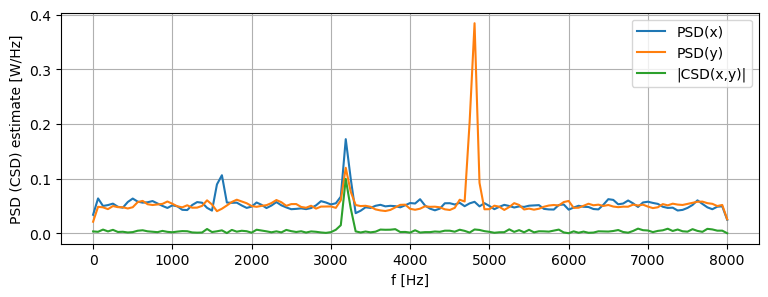

In [163]:
plt.figure(figsize=(9, 3))
plt.plot(f, Pxx_welch, label='PSD(x)')
plt.plot(f, Pyy_welch, label='PSD(y)')
plt.plot(f, abs(Pxy_welch), label='|CSD(x,y)|')
plt.grid(); plt.xlabel('f [Hz]'); plt.ylabel('PSD (CSD) estimate [W/Hz]')
plt.legend()
plt.show()

## Задача 4.4. Периодограмма Ломба-Скаргла

| Варианты: |       1      |     2     |         3        |      4     |        5        |        6       |
|:---------:|:------------:|:---------:|:----------------:|:----------:|:---------------:|:--------------:|
| **Имя файла** | variant_1_ex_3_4.npy | variant_2_ex_3_4.npy | variant_3_ex_3_4.npy | variant_4_ex_3_4.npy | variant_5_ex_3_4.npy| variant_6_ex_3_4.npy|

Постройте периодограмму Ломба-Скаргла для данных, представленных в файле, который соответствует номеру Вашего варианта.
Известно, что исходный сигнал до взятия отсчетов с неравномерным шагом имеел форму
$$x(t)=a_1 \sin(2\pi f_1 t) + a_2 \sin(2\pi f_2 t)+  \varepsilon(t),$$
где $\varepsilon(t)$ — реализация белого шума с нулевым математическим ожиданием и дисперсией $\sigma^2>0$, причем частоты $ f_1$, $ f_2 $ представлены целым числом килогерц и не превосходят 8 кГц. Оцените частоты $ f_1$ и $ f_2 $, используя периодограмму Ломба-Скаргла.

Ниже приведен пример кода, позволяющий выгрузить отчеты сигнала $x(t_i)$  (`x`) в моменты времени $t_i$ (`t`). 

In [164]:
fs = 16e3
x, t = np.load('dataset_lab5/variant_1_ex_3_4.npy')

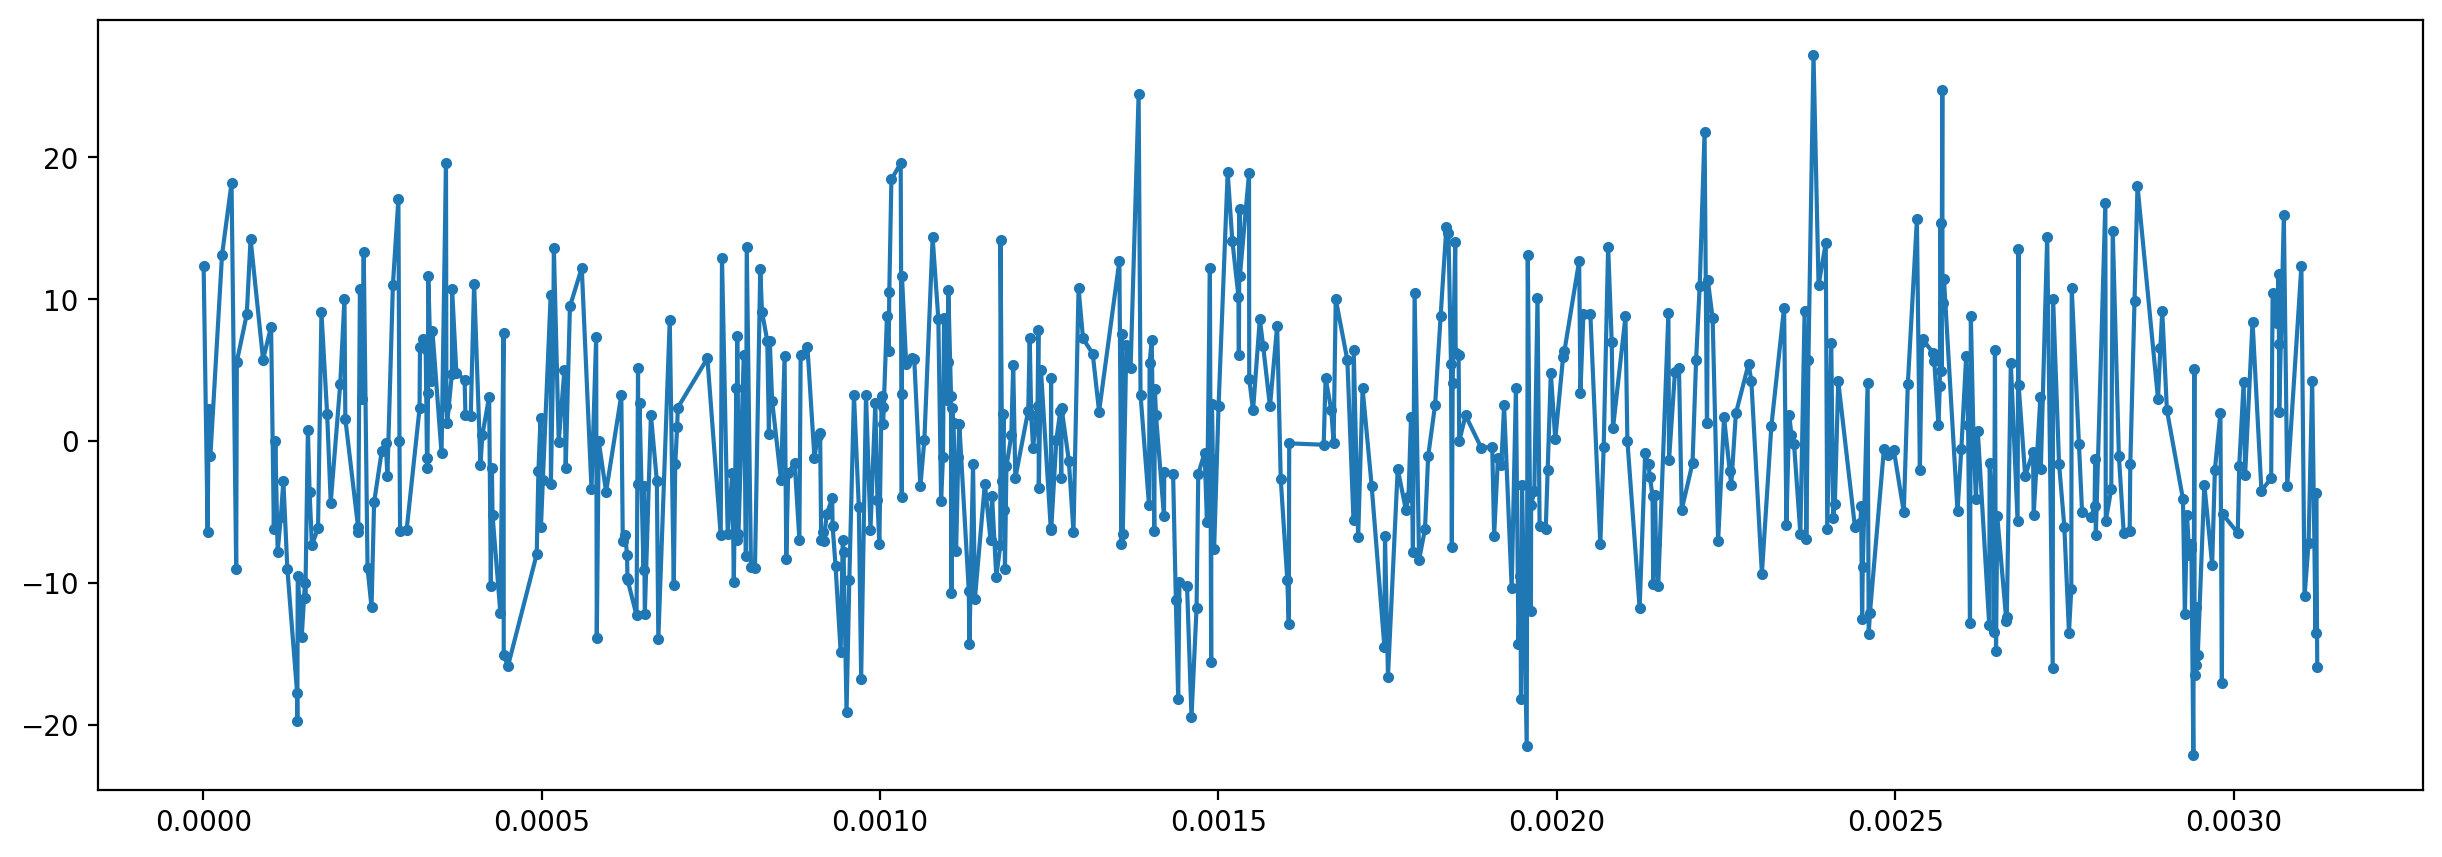

In [165]:
plt.figure(figsize=(15, 5), dpi=200)
plt.plot(t, x, marker='.')
plt.show()

In [166]:
w = np.linspace( fs/2**14, fs/2, 2**12)*2*np.pi  # выберем данные частоты для поиска в сигнале

In [167]:
pgram = signal.lombscargle(t, x, w, normalize=True)

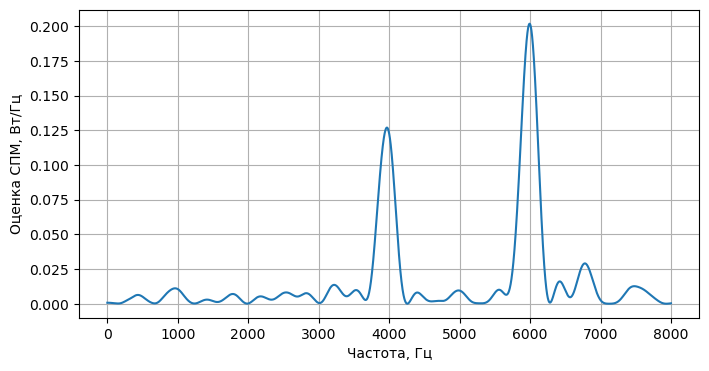

In [168]:
plt.figure(figsize=[8, 4])
plt.plot(w/(2*np.pi), pgram)
plt.xlabel('Частота, Гц')
plt.ylabel('Оценка СПМ, Bт/Гц')
plt.grid()
plt.show()